In [1]:
#https://www.youtube.com/playlist?list=PLeo1K3hjS3ut2o1ay5Dqh-r1kq6ZU8W0M
#kaggle.com/amitabhajoy/bengaluru-house-price-data

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10) #change the default width and height of the two plots


Bad key figure.hooks in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 106 ('figure.hooks:          # list of dotted.module.name:dotted.callable.name')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.bfit in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 343 ('mathtext.bfit: sans:italic:bold')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key axes3d.xaxis.panecolor in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 431 ('axes3d.xaxis.panecolor:    (0.95, 0.95, 0.95, 0.5)  # background pane on 3D axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key

In [2]:
df1 = pd.read_csv("real_estate.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
'''
now in area type we can see that their are different tyes like 

      'Super built-up Area', 'Plot Area', 'Built-up Area'
      
      so we will count these area types
'''

df1.groupby('area_type')['area_type'].agg('count') # we group our dataframe by area type and then we aggrigate the count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
'''
we will keep our model simple and we will drop columns like
    'area_type', 'availability', 'society', 'balcony'
    
'''

df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#Data Cleaning Process

In [6]:
#handling NA/missing values

df2.isnull().sum() #summing all null values 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#we have 73 rows where values of bathroom is not available
#since we have 13320 we can drop NA columns

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
'''
now we will explore size colimn which says BHK = Bedroom, Hall and Kitchen, Bedroom, RK = Room Kitchen. 
We will see unique columns
'''

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
'''
Now we will create a new column called BHK and merge BHK with Bedroom and RK. Here, we will take the string value,
tokenize it and take first token i.e. number from string using lambda function
'''

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

# lambda x: <--- contains column values of each rows and on that value we would like to apply some transformation and 
# x.split(' ')[0] <--- will split '2 BHK' into '2','BHK' on basis of ' ' and returns two tokens out of which we want 1st token
#                      and this token is still a string so we convert to integer
# int(x.split(' ')[0])

df3.head()

/tmp/ipykernel_9877/2001990044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
#so we halve integer values. Notice that we have 43 bedroom in dataset so exploring that row

df3[df3.bhk>20] #returns bhk with > 23

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
'''
We can see that 2400 sq feet have 43 BHK=Bedroom Hall Kitchen and it looks like error/outlier so cleaning it, But
first we could like to explore total_sqft as well


We want total_sqft in single digit
'''

df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
'''
notice that the datatype is string and another problem is that we have a range '1133 - 1384' so we would like to 
remove that

So, creating a function to detect whether the datatype is floar or a range
'''

def is_float(x):
    try:
        float(x)#this function will try to convert string to float and if error occurs then next block will execute
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)]

# ~ is a negate operation
#df3['total_sqft'].apply(is_float) applys all the column to our function and returns index

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [24]:
#now using lambda function we will convert this to loat and replace its value with avarage

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
'''
Also come values are in '34.46Sq.' Meter and '4125Perch'. Note that the unit is sqft and these values have different 
units. Now, we will use lambda function to seperate range value and find average and in case we find values like
34.46Sq. Meter and 4125Perch we will remove it.
'''

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [26]:
#testing our function

print(convert_sqft_to_num('2166'))
print(convert_sqft_to_num('1220-1145'))
print(convert_sqft_to_num('4125Perch'))

2166.0
1792.5
None


In [28]:
df4=df3.copy() #create a deep copy of data frame
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)#inside apply() we can put function to apply
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [31]:
df4['total_sqft'].dtype

dtype('float64')

#Feature Engineering

In [33]:
df5 = df4.copy()

'''
we will create price per sq feet column becauese price/sq_ft is important in real estate. Also this feature will help
in outlier cleaning. 

'''

#price is per lakh so

df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [34]:
'''
We will look into this column later on but now we will look into location column. CHecking unique location available
in dataframe because location is a categorical data and if their are to many loation it may create a problem
'''

df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [36]:
len(df5.location.unique()) #counting unique location

1304

In [37]:
'''
Here we have 1304 unique location and if we do one hot encoding then it will create 1304 columns and we will ahve too
many columns. This is an example of dimentionality curse. Here, among 1304 data we ca find 1-2 location having only 
1-2 columns of data. 
'''

df5.location = df5.location.apply(lambda x:x.strip()) #this will strip spaces so that we dont have same datapoints with
                                                      #same name but whth different spaces
    
location_stats =  df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
                  #this will group location and count unique values in column and sort them in descending order                    
    
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [39]:
#now we can say that if we have less than 10 data of ame location then we can label them as other. Counting such data

len(location_stats[location_stats<=10])

1052

In [42]:
len(df5.location.unique())

1293

In [40]:
'''
So, their re 1052 datasets out of 1293 datasets which has less than 10 dataentry. Now, we will use this information 
to qualify location as 'other' location. 

'''

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [44]:
#now we will label these data as others

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [45]:
#now the unique unique data in location column has reduced to 242 and is managable in creating one hot encoding

df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1763,other,3 BHK,1464.0,3.0,56.00,3,3825.136612
9337,other,2 BHK,1148.0,2.0,69.00,2,6010.452962
7533,JP Nagar,3 BHK,1600.0,3.0,83.00,3,5187.500000
2518,Hosakerehalli,4 Bedroom,800.0,4.0,120.00,4,15000.000000
863,Subramanyapura,2 BHK,1200.0,2.0,52.00,2,4333.333333
13121,Kudlu Gate,3 BHK,1432.0,2.0,61.11,3,4267.458101
11080,other,4 BHK,8321.0,5.0,2912.00,4,34995.793775
2429,Padmanabhanagar,4 Bedroom,3400.0,3.0,210.00,4,6176.470588
6738,Banashankari,2 BHK,1105.0,2.0,90.00,2,8144.796380
3509,Jigani,3 Bedroom,2400.0,3.0,149.00,3,6208.333333


Outlier Removal

In [50]:
'''
For removing any outlier a domanin knowledge is essential. 
         
Also, for BHK=6 and total_sqft = 600, total_sqft/BHK=100 which is very small so we will remove such values.

So, for that we will divide total_sqft by bhk and see the ratio for any outliers.

Now, you create a threshold for removing such outliers. Typically you go to your manager and ask for typical 
total_sqft/bhk value and set it.
'''

df5[df5.total_sqft/df5.bhk<300].sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9127,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,240.0,5,20000.000000
757,other,5 Bedroom,1000.0,4.0,160.0,5,16000.000000
10109,Kengeri Satellite Town,5 BHK,1200.0,5.0,70.0,5,5833.333333
6764,other,6 Bedroom,850.0,6.0,78.0,6,9176.470588
12031,other,4 Bedroom,600.0,4.0,70.0,4,11666.666667


In [53]:
#before removing them lets check number of rows
print(df5.shape)
print(len(df5[df5.total_sqft/df5.bhk<300]))#total_sqft/bhk = very small case

(13246, 7)
744


In [54]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]#here ~ will remove all dataframe satisfying the condition
df6.shape

(12502, 7)

In [58]:
'''
now checking outlier for price per total_sqft
'''

df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [62]:
'''
Now, per sq ft price of land cant be as low as 267 and as high as 176470. SO, we will assume our dataset is in normal
distribution and remove dataset outside standard deviation of 1. i.e. it covers aroung 68% of out dataset

Now, we sould d]o this per location because some location will have high price and other may have low price. 
'''

def remove_pps_outliers(df): #<--- we gave dataframe as an input
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'): #<--- grouping them by location first
        m = np.mean(subdf.price_per_sqft) #<--- and per location we get subdf dataframe
        st = np.std(subdf.price_per_sqft) #<--- for each dataframe we calculate mean 'm' and 'st' standard deviation 
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))] #<--- we will keep everything between sd+mean and sd-mean and remove others
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) #<--- appendinf dataframe per location
    return df_out 

df7 = remove_pps_outliers(df6)
df7.shape

(10231, 7)

In [63]:
df7.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5246,Nagavara,4 BHK,2496.0,4.0,125.00,4,5008.012821
2959,Hegde Nagar,2 Bedroom,1200.0,2.0,75.00,2,6250.000000
7296,Whitefield,3 BHK,3480.0,4.0,284.00,3,8160.919540
5437,Panathur,2 BHK,1210.0,2.0,77.93,2,6440.495868
8052,other,1 BHK,834.0,1.0,60.00,1,7194.244604
8614,other,9 Bedroom,4500.0,9.0,166.00,9,3688.888889
5780,Rajaji Nagar,3 Bedroom,2300.0,4.0,240.00,3,10434.782609
5965,Sarakki Nagar,3 BHK,2145.0,4.0,270.00,3,12587.412587
8609,other,3 BHK,1250.0,3.0,40.00,3,3200.000000
5361,Old Madras Road,2 BHK,1210.0,2.0,80.00,2,6611.570248


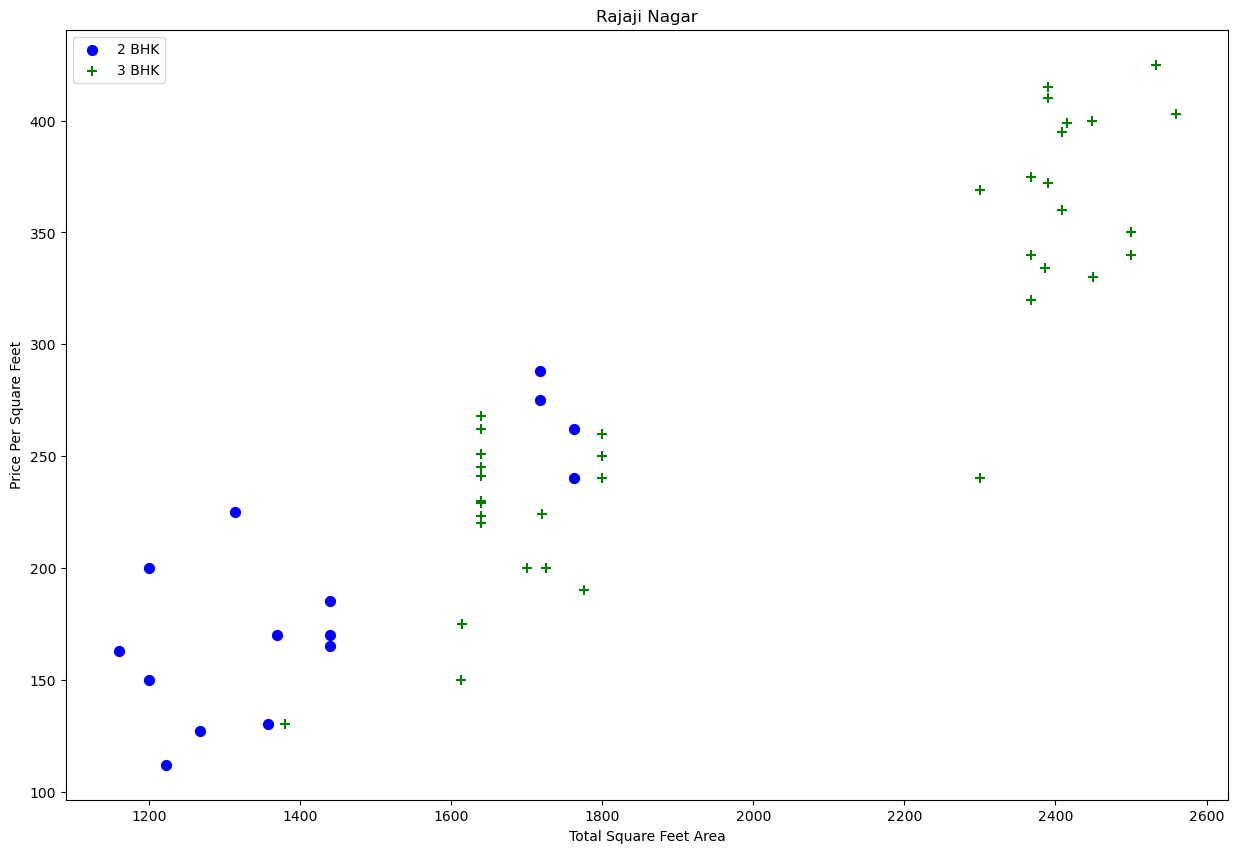

In [66]:
'''
Another visualization we should do is check whether the price for 2 bhk is higher than price fro 3 bhk (usually the
opposite should be true). This can happen as the property may lie close to some especial privileged places

So, we will write a function which will use scatter plot for data visualization
'''

def plot_scatter_chart(df,location):#<-- function takes dataframe and location
    bhk2 = df[(df.location==location) & (df.bhk==2)]#<-- 
    bhk3 = df[(df.location==location) & (df.bhk==3)]#<-- 
    matplotlib.rcParams['figure.figsize']=(15,10)#<-- 
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)#<-- 
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)#<-- 
    plt.xlabel('Total Square Feet Area')#<-- 
    plt.ylabel('Price Per Square Feet')#<-- 
    plt.title(location)#<-- 
    plt.legend()#<-- 

plot_scatter_chart(df7,'Rajaji Nagar')    

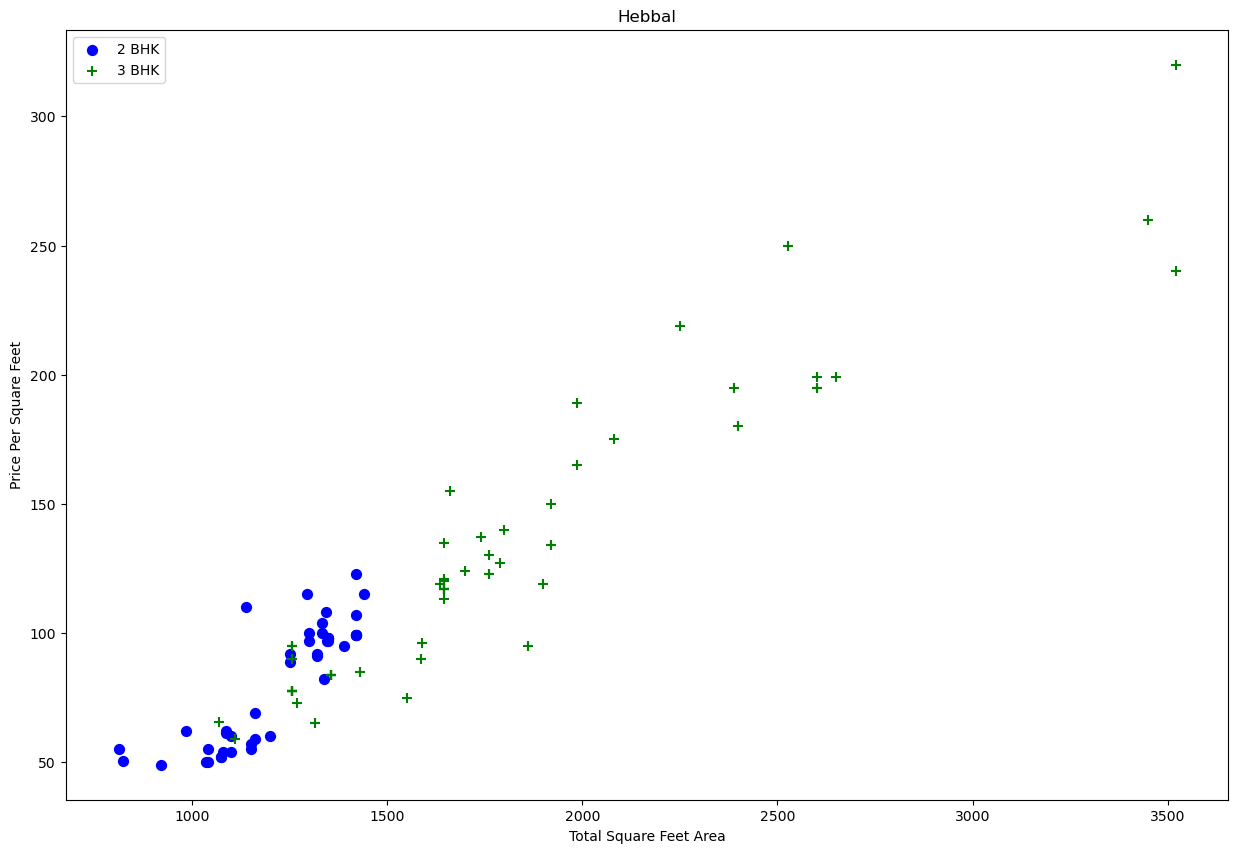

In [67]:
plot_scatter_chart(df7,'Hebbal')   

In [71]:
'''
We can see is some cases that in a vertical line that 3 bhk (green) has lower price than 2 bhk (blue) property so we 
have to remove such outliers. This function will create a per bedroom homes statistics which has

mean, standard deviation, count for 2 bhk 
                  and 
mean, standard deviation, count for 3 bhk

and then if mean_2bhk > mean_3bhk for same sqft area then we will remove all 2 bhk data

Also, using similar concept we should remove all data whose mean(1 bhk) whose price is higher than mean(2 bhk)
'''

def remove_bhk_outliers(df):#<--- function takes in a dataframe
    exclude_indices = np.array([])
    for loation,location_df in df.groupby('location'):#<---here we groupby location and loop through each location
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):#<---for every location dataframe we create a new dataframe based on bhk
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),#<--- per bhk we create mean, std and count
                'count':bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('bhk'):#<--- we will run same for loop again 
            stats=bhk_stats.get(bhk-1)#<--- we will exclude datapoints which values price_per_sqft is less than the mean of prevoous bhk
            if stats and stats['count']>5:#<---for 2 bhk we will filter 1 bhk whose average 2_bhk<1_bhk and for 3 bhk we will filter 2 bhk whose average 3_bhk<2_bhk  
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        
    return df.drop(exclude_indices,axis='index')   

df8=remove_bhk_outliers(df7)
df8.shape

(7326, 7)

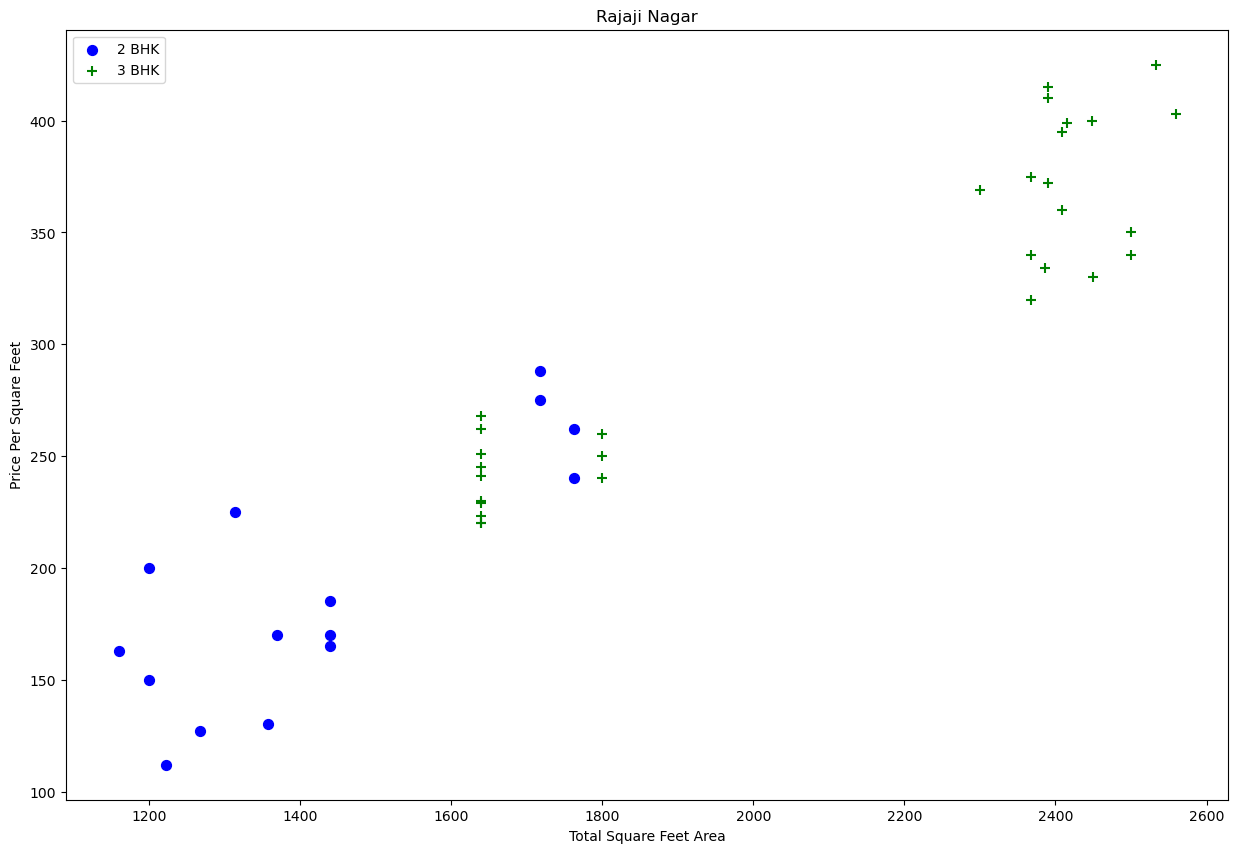

In [72]:
plot_scatter_chart(df8,'Rajaji Nagar')

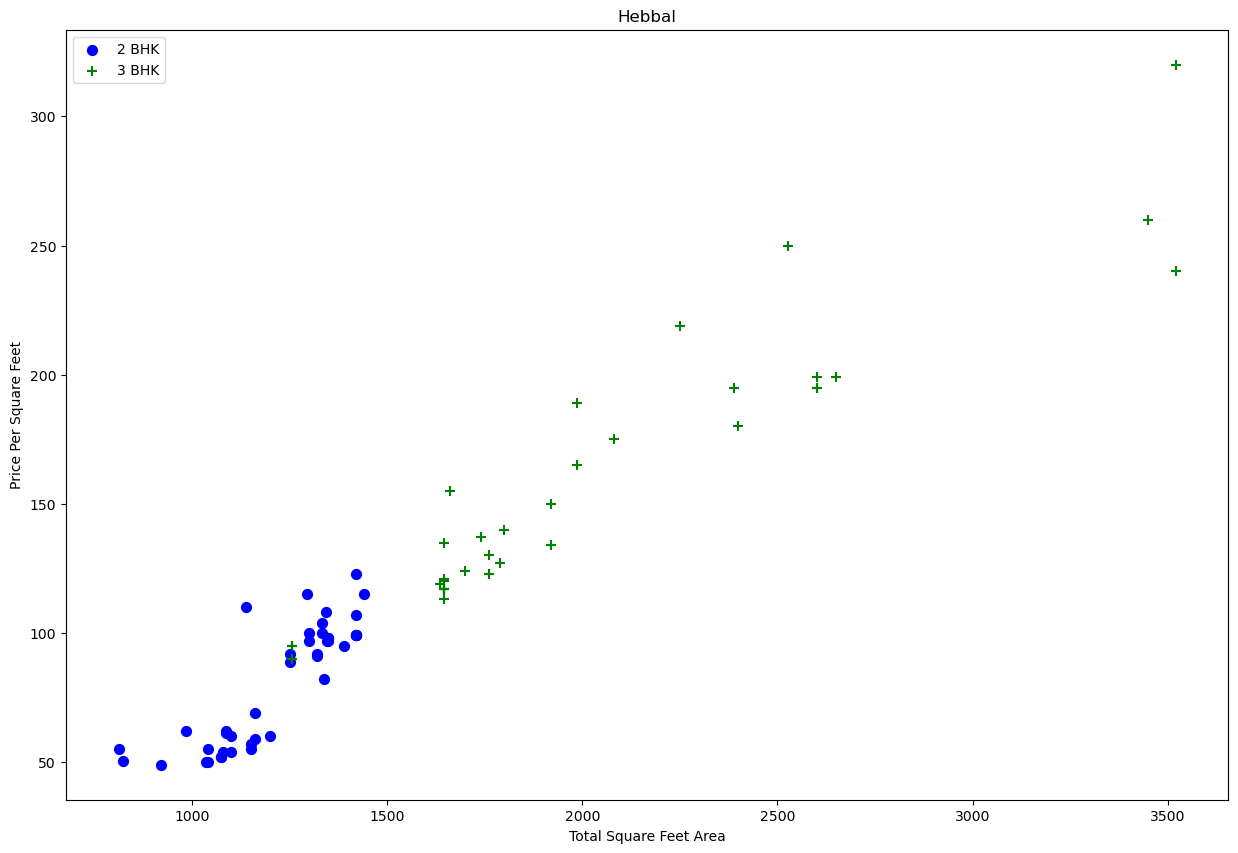

In [74]:
plot_scatter_chart(df8,'Hebbal')   

Text(0, 0.5, 'Count')

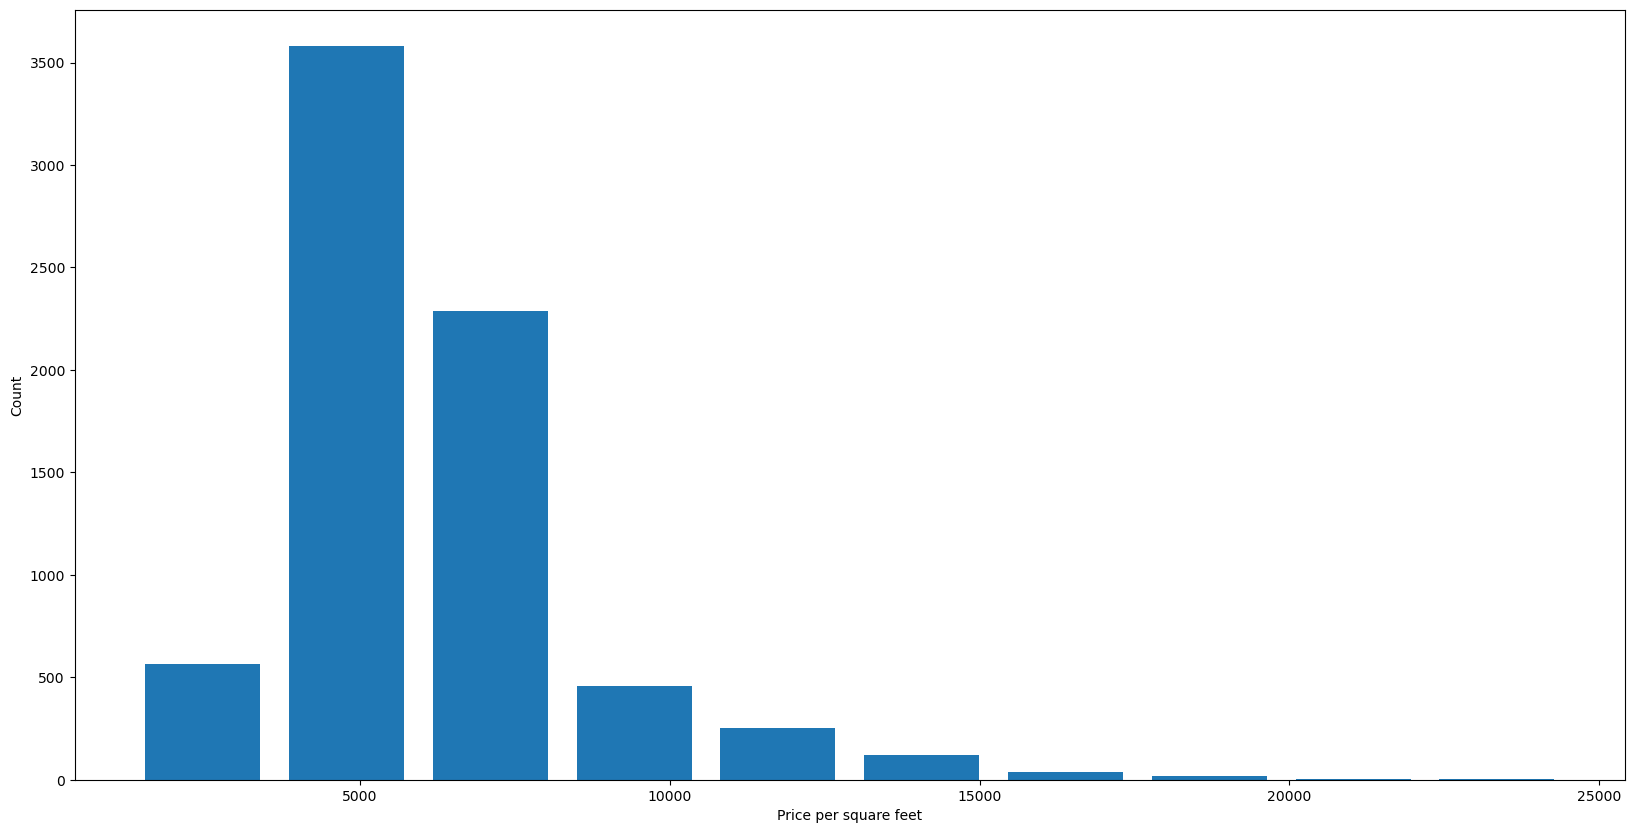

In [80]:
#plotting a histogram for seeing how many apartment we have per sq_ft area

plt.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [81]:
#So the dataset has skewed normal distribution so it is looking normal. Now, exploring 'bath' column 

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [82]:
df8.bath.describe()

count    7326.000000
mean        2.449222
std         1.006234
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: bath, dtype: float64

In [87]:
df8[df8.bath>10] #now if bathroom > (bhk + 2) than we will remove these outliers because it is unusual to have such a
                 #large number of bathroom

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8476,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8565,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9298,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9629,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

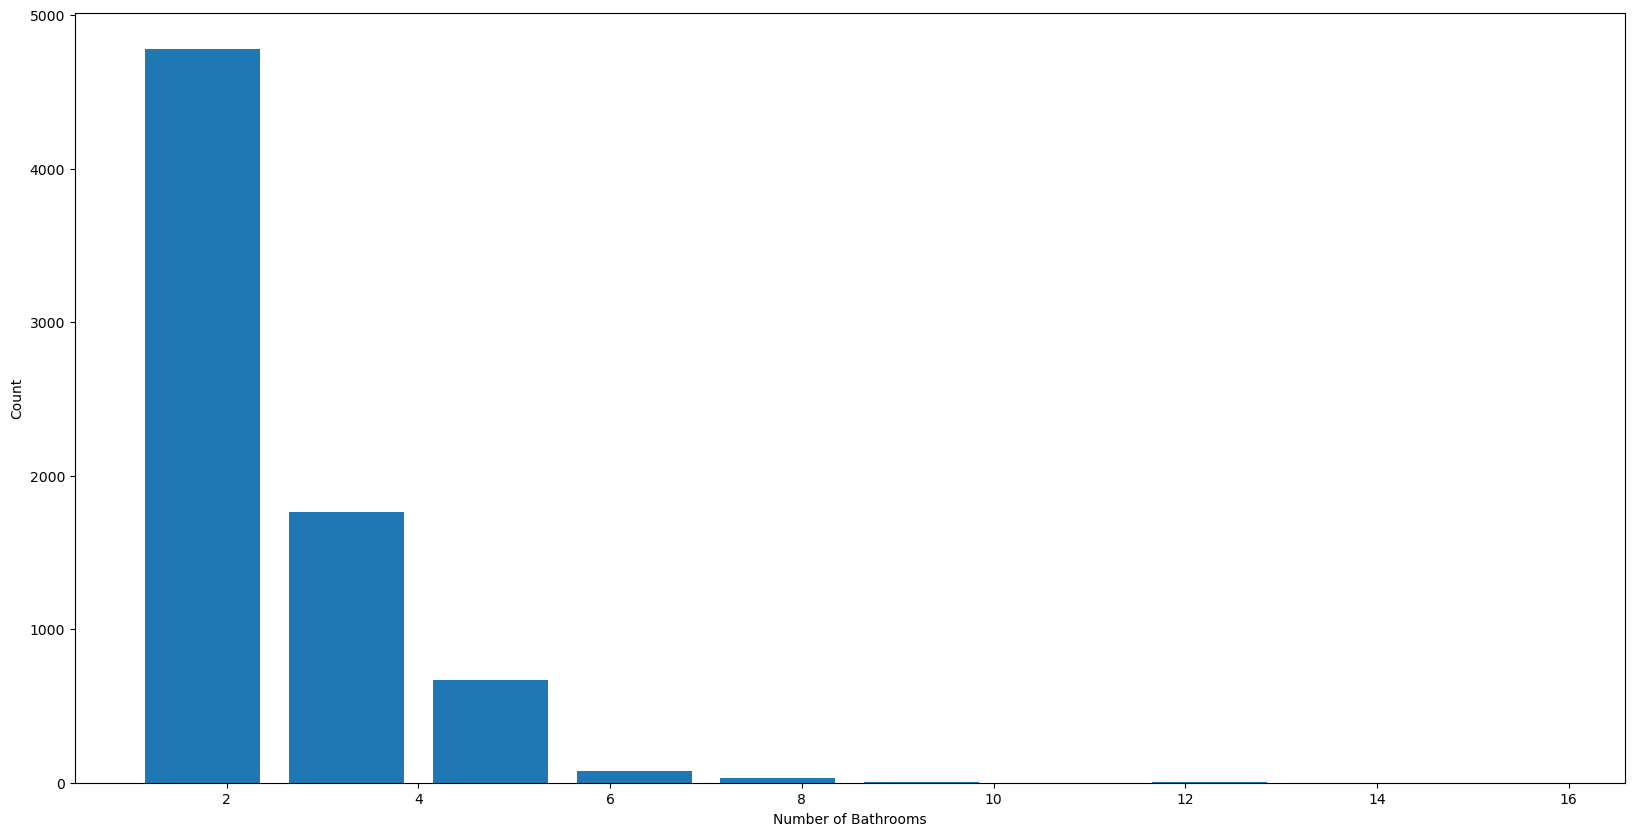

In [88]:
plt.hist(df8.bath,rwidth=0.8)#rwidth is width of histogram
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [89]:
#most of the property have < 10 bathrooms. Removing data with bathroom > (bhk + 2) 

df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8401,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [90]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape #these outliers are removed

(7252, 7)

In [91]:
#we will remove some unnecessary columns like 'size', 'price_per_sqft' <--- created just to remove outliers also we have to predict price at the end

df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.sample(10)

,location,total_sqft,bath,price,bhk
471,Anekal,1200.0,2.0,36.00,4
3437,Hulimavu,1200.0,2.0,50.00,2
4028,Kanakapura,1120.0,2.0,39.20,2
10135,other,3100.0,5.0,425.00,4
6935,Uttarahalli,1025.0,2.0,35.88,2
8702,other,1200.0,3.0,95.75,3
5457,Parappana Agrahara,1194.0,2.0,46.00,2
4950,Marathahalli,1215.0,2.0,67.00,2
6311,Sarjapur Road,1346.0,2.0,69.61,2
2156,Electronic City,589.0,1.0,29.00,1


#Model Building

In [93]:
#We will use K fold cross validation and grid search cv to come up with algorithm as well as the best parameter
#Using panda dummies for one hot encoding of location column

dummies = pd.get_dummies(df10.location)#One hot encoding on location
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10226,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [94]:
#now concatenating dummies with df10 into df11

'''
NOTE: What is the Dummy Variable Trap? The Dummy Variable Trap occurs when two or more dummy variables created by 
one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the 
others, making it difficult to interpret predicted coefficient variables in regression models.

        d1       d2      d3
        
red      1        0       0
green    0        1       0
blue     0        0       1   

To avoid this trap, omit one dummy variable, creating a reference category.

i.e. 

        d2       d3      
        
red      0        0       
green    1        0       
blue     0        1          


now if d2 = 0 and d3 = 0 then we know d1 = red which can be wsed to identify it.
'''

df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

#dummies.drop('other',axis='columns') removing dummy variable to remove one hot encoding trap

df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10223,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10226,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
#Dropping location column becauese we have already created dummy location columns by one hot encoding

df12=df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10223,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10226,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10227,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
#creating independent variable X (except price) and dependent variable y (price)

X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
y=df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10222     70.0
10223    200.0
10226    110.0
10227     26.0
10230    400.0
Name: price, Length: 7252, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)#20% for testing, 80% for training

In [99]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)#<--- training of our model
lr_clf.score(X_test,y_test)#<--- evaluates how good our training model was on test samples
#85% is pretty good score and typically a data scientist would comeup with different models with couple of different
#parameters, analyze the score and fianlly choose a best optimal model 

0.8515492485426355

In [100]:
'''
We will use k fold cross validation for data training and testing

In K-fold cross-validation, the data set is divided into a number of K-folds and used to assess the model's ability 
as new data become available. 

# Training
* Testing

K = 5 folds * # # # #
            # * # # #
            # # * # #
            # # # * #
            # # # # *
 
'''

from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#creating a shuffle split for cross validation with K=5, this
       #will randomize the distribution of sample data

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83419256, 0.84066871, 0.85637292, 0.84326517, 0.84613103])

In [122]:
'''
We get 84% score which is pretty decent. Even with 5 k fold validation we got 84% score now we will try other 
regression techniques. Lasso regression, decision tree regression etc. As a data engineer we have to analyze different
algorithm using a method called grid search cv and from which we get optimum regression algorithm.
'''

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [132]:
def find_best_model_using_gridsearchcv(X,y):
    algos={
        
        'linear_regression':{
            'model':LinearRegression(),#<-- we have especified algorithm as well as parameters
            'params':{
                #'normalize':[True,False]#<-- grid_search_cv will not only tells best algorithm but also tells us 
                        #the best parameter for particular algorithm and this is called hyper parameter tuning
                #'normalize': parameter was deprecated since version 1.0
                #https://scikit-learn.org/1.0/modules/generated/sklearn.linear_model.LinearRegression.html
                
                'copy_X' : [True, False],
                #'fit_intercept' : [True, False],
                #'n_jobs' : [1,2,3],
                #'positive' : [True, False]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []#<-- we will store in this list
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#<-- cross validation shuffle split which will randomly
                #shuffle samples 
        
    for algo_name,config in algos.items():#<-- this will go through python dictionary algos
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)#<-- initializing gridsearchcv with this model = LinearRegression(),Lasso(),DecisionTreeRegressor() and their parameters
        gs.fit(X,y)# trains our mdel with dataset         #^--- for cross valdation we will use cv objects with 5 fold cross validation      
        scores.append({ #<--- append score from each model
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
         })
            
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])  

In [133]:
find_best_model_using_gridsearchcv(X,y)

/home/anonymous/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anonymous/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/a

,model,best_score,best_params
0,linear_regression,0.844126,{'copy_X': True}
1,lasso,0.717719,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.713600,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [134]:
#Here winner is [linear_regression ---> 0.844126 ---> {'copy_X': True}]
#Since above model lr_clf is aleady trained with this we dont have to change and directly use to predict property price

X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [135]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]#returns its column indes as 5; This is required for predict function

5

In [137]:
#Function to predict price

def predict_price(location,sqft,bath,bhk):#<-- predict function takes location,sqft,bath,bhk
    loc_index=np.where(X.columns==location)[0][0]#-----^ see above cell
                      #^--- for location we will locate appropriate column 
        
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:# after we have location index, that index can be set to 1 and on doing so will give us the predicted price
        x[loc_index]=1
    
    return lr_clf.predict([x])[0]

In [138]:
predict_price('1st Phase JP Nagar',1000,2,2)

/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.22924041915287

In [139]:
predict_price('1st Phase JP Nagar',1000,3,3)

/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.41872656290933

In [140]:
predict_price('Indira Nagar',1000,2,2)

/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.82117905221915

In [141]:
predict_price('Indira Nagar',1000,3,3)

/home/anonymous/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.01066519597558

In [142]:
#Now we shall export this model to a pickle file so that it can be implememtd in python flask server

import pickle

with open('home_price_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [143]:
#Along with our model, column information and the way it is structured is important so exporting it in json file

import json

columns = {
    'data_columns':[col.lower() for col in X.columns]#converting all columns into lowercase
}
    
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [144]:
#json and pickle files are going to be used in python flask server